# Exploring and Processing the UNSW-NB15 Dataset

**Official dataset link:** [UNSW-NB15](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

**Reference paper:** [Comprehensive Analysis of Intrusion Detection Systems](https://arxiv.org/pdf/2101.05067)

In this Jupyter Notebook, we will explore and process the UNSW-NB15 dataset.

Let's dive into our analysis and processing of the features in the UNSW-NB15 dataset!


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:

# Function to create binary columns from categorical values
def create_binary_columns(df, column, values):
    for value in values:
        df[f'{column}_{value}'] = df[column].apply(lambda x: 1 if x == value else 0)
    df[f'{column}_others'] = df[column].apply(lambda x: 1 if x not in values else 0)
    return df

# Function to drop columns from DataFrame
def drop_columns(df, columns):
    return df.drop(columns=columns)


In [3]:

# Define paths for training and testing datasets
training_file = "/users/mik2002/UNSW-NB15-dataset/CSV_Files/Training and Testing Sets/UNSW_NB15_training-set.csv"
testing_file = "/users/mik2002/UNSW-NB15-dataset/CSV_Files/Training and Testing Sets/UNSW_NB15_testing-set.csv"

# Output paths for processed datasets
output_training_file = '/users/mik2002/som/dataset-processed UNSW-NB15/training_processed.csv'
output_testing_file = '/users/mik2002/som/dataset-processed UNSW-NB15/testing_processed.csv'

# Load training and testing datasets
df_training = pd.read_csv(training_file)
df_testing = pd.read_csv(testing_file)

# Concatenate training and testing datasets
df = pd.concat([df_training, df_testing], ignore_index=True)


Info about the combined dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss             

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_-,state_others,attack_cat,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,1,0,0,0,0,0,0,0,Normal,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,1,0,0,0,0,0,0,0,Normal,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,1,0,0,0,0,0,0,0,Normal,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,0,0,0,0,0,0,0,Normal,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,1,0,0,0,0,0,0,0,Normal,0


Info about the updated dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dur             257673 non-null  float64
 1   spkts           257673 non-null  int64  
 2   dpkts           257673 non-null  int64  
 3   sbytes          257673 non-null  int64  
 4   dbytes          257673 non-null  int64  
 5   rate            257673 non-null  float64
 6   sttl            257673 non-null  int64  
 7   dttl            257673 non-null  int64  
 8   sload           257673 non-null  float64
 9   dload           257673 non-null  float64
 10  sloss           257673 non-null  int64  
 11  dloss           257673 non-null  int64  
 12  sinpkt          257673 non-null  float64
 13  dinpkt          257673 non-null  float64
 14  sjit            257673 non-null  float64
 15  djit            257673 non-null  float64
 16  swin            257673 n

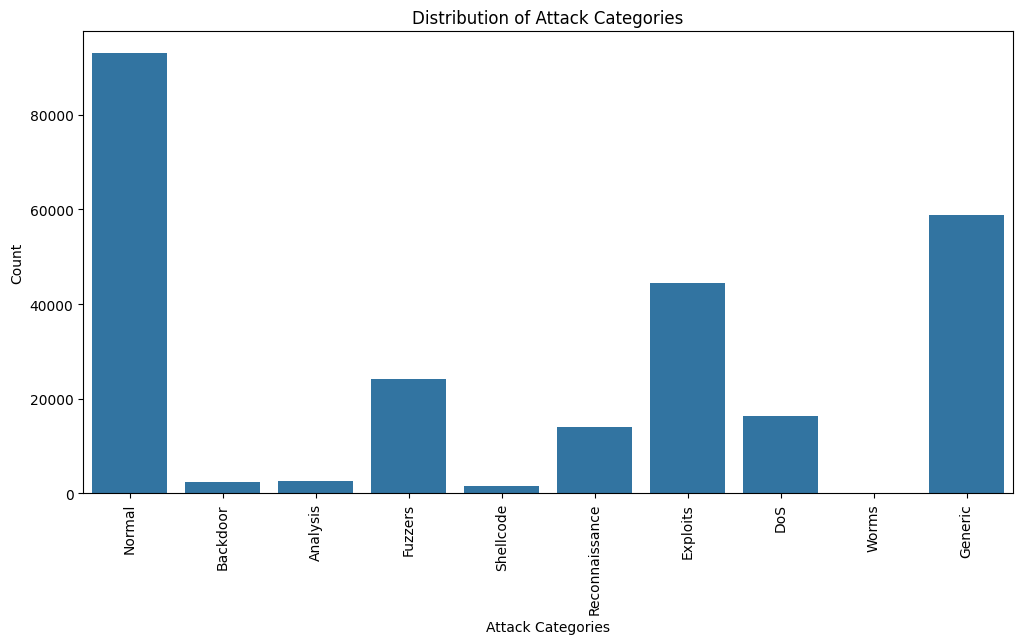

Attack categories present in the dataset: ['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']
Processed training dataset saved to /users/mik2002/som/dataset-processed UNSW-NB15/training_processed.csv
Processed testing dataset saved to /users/mik2002/som/dataset-processed UNSW-NB15/testing_processed.csv


In [4]:

# Display basic information about the dataset
print("Info about the combined dataset:")
df.info()

# Display unique values for 'proto' and 'state'
print("Unique values in 'proto':", df['proto'].unique())
print("Unique values in 'state':", df['state'].unique())

# Create binary columns for 'proto', 'service', and 'state'
proto_values = ['tcp', 'udp', 'unas', 'arp', 'ospf', 'sctp']
service_values = ['http', 'irc', 'pop3', 'radius', 'smtp', 'snmp', 'ssh', 'ssl']
state_values = ['ACC', 'CLO', 'CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', '-']

df = create_binary_columns(df, 'proto', proto_values)
df = create_binary_columns(df, 'service', service_values)
df = create_binary_columns(df, 'state', state_values)

# Drop original categorical columns 'proto', 'service', 'state'
df = drop_columns(df, ['proto', 'service', 'state'])

# Drop non-informative columns
columns_to_drop = [
    'id', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_ftp_login', 'synack', 'ackdat', 'smean', 
    'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 
    'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_sm_ips_ports'
]
df = drop_columns(df, columns_to_drop)

# Move 'attack_cat' and 'label' columns to the end
cols = [col for col in df.columns if col not in ['attack_cat', 'label']]
df = df[cols + ['attack_cat', 'label']]

# Display the first few rows of the updated dataset
print("Updated dataset with new columns for 'proto', 'service', and 'state' and removal of original columns:")
display(df.head())


# Normalize numeric features using StandardScaler
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Separate into training and testing datasets
df_training_processed = df.iloc[:len(df_training)]
df_testing_processed = df.iloc[len(df_training):]

# Save the processed training dataset to a CSV file
df_training_processed.to_csv(output_training_file, index=False)
print(f"Processed training dataset saved to {output_training_file}")

# Save the processed testing dataset to a CSV file
df_testing_processed.to_csv(output_testing_file, index=False)
print(f"Processed testing dataset saved to {output_testing_file}")
